# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [4]:
%matplotlib widget 

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx

# Visa interface for the M8190A instrument:

In [2]:
M8190A = VisaR(AWG_Settings4,60000)

In [3]:
Initialization(M8190A,AWG_Settings4)

Instruments Sampling Frecuency set to 5.00000000000000E+08Hz
Instruments DC1 Output route Voltage set to 7.00000000000000E-01deciVolts


In [4]:
M8190A.query('*IDN?')

'Agilent Technologies,M8190A,MY57701776,5.6.0.0-2'

In [13]:
M8190A.write('*RST')

5

In [5]:
M8190A.query('FREQ:RAST?')

'5.00000000000000E+08'

In [6]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [4]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


# Loading and triggering a single waveform:

In [13]:
def Trigger_Segment1(instrument,file_location,segid,DAQ,channel,voltage,playingtime):
    """This function will load one segment to the AWG and set it up to triggered mode, then it will start it, trigger it and stop it. Whole duration of this will be
        given by the sleep parameter.
        
        This function calls the Segment_File function and the Trigger_Pulse function.
    """
    #loading the segment to AWG
    Segment_File(instrument,'{loc}'.format(loc = file_location),segid)

    #Setting up the triggering settings
    instrument.write('TRAC:SEL {id}'.format(id = segid))
    instrument.write('TRAC:ADV COND')
    instrument.write('INIT:GATE1 0')
    instrument.write('INIT:CONT1 0')
    instrument.write('ARM:TRIG:IMP HIGH')
    instrument.write('ARM:TRIG:LEV {vol}'.format(vol = voltage - 0.5))
    instrument.query('*OPC?')
    instrument.write('INIT:IMM')

    #Setting up the triggering voltage from the DAQ
    time.sleep(10)
    Trigger_Pulse('{daq}'.format(daq = DAQ),'{chn}'.format(chn = channel),voltage,11)

    #setting AWG playing time
    time.sleep(playingtime)
    instrument.write('ABOR')

In [14]:
Trigger_Segment1(M8190A,"D:\Alejandro\Pulses\Dict\S2\SegmentA_7500000_1.csv",1,'DAQBNC1','ao1',1.5,10)

Done


In [5]:
#triggering related to M8190A.write(':INIT:GATE1 0')
# M8190A.write(':INIT:CONT1 0')
#15ms time length
#maybe I have to modified this function to account for different loops on TRAC subsystem with instrument.write(':TRAC1:COUN L'); with L the number of desired loops

Segment_File(M8190A,"D:\Alejandro\Pulses\Dict\S2\SegmentA_7500000_1.csv",1)


In [5]:
#Trigger mode
M8190A.write('TRAC1:ADV COND')
M8190A.write(':INIT:GATE1 0')
M8190A.write(':INIT:CONT1 0')
M8190A.write(':ARM:TRIG:IMP HIGH')
M8190A.write('ARM:TRIG:LEV 1')


15

In [6]:
M8190A.write('INIT:IMM')

9

In [8]:
M8190A.write('TRIG:BEG')

9

In [10]:
Trigger_Pulse('DAQBNC1','ao1',1.5,4)

In [10]:
M8190A.write('ABOR')

5

In [5]:
dfa, dfb, tim = Sequence_Triggered(PList_secondsA,PList_secondsB,10,0,15,7500000,M8190A,AWG_Settings4,1,'DAQBNC1','ao1',1.5,10)

Current Segment Catalogue is 1,7500000  [(segment id, Segment size)]
Current Segment Catalogue is 1,7500000,2,7500000  [(segment id, Segment size)]
Sequence advancement method is COND
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Triggering Pulse Started
Triggering Pulse Stoped


In [6]:
dfa['Y1']*700

0            0.0
1          500.0
2          500.0
3          500.0
4          500.0
           ...  
7499995      0.0
7499996      0.0
7499997      0.0
7499998      0.0
7499999      0.0
Name: Y1, Length: 7500000, dtype: float64

In [7]:
dfb['Y1']*700

0            0.0
1          500.0
2          500.0
3          500.0
4          500.0
           ...  
7499995      0.0
7499996      0.0
7499997      0.0
7499998      0.0
7499999      0.0
Name: Y1, Length: 7500000, dtype: float64

In [18]:
fig,ax= plt.subplots(2)

ax[0].grid(True)
ax[1].grid(True)
fig.suptitle('Pulses Loaded into the AWG')


ax[0].plot(tim,dfa['Y1']*700,label= 'Pulse A',color='blue')
ax[1].plot(tim,dfb['Y1']*700,label= 'Pulse B',color='red')
ax[0].set_ylabel('V  [mV]')
ax[0].set_xlabel('t  [ms]')
ax[1].set_ylabel('V  [mV]')
ax[1].set_xlabel('t  [ms]')

#ax.set_title('Pulses Loaded into the AWG')

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
Trigger_Pulse('DAQBNC1','ao1',1.5,4)

In [19]:
task = nidaqmx.Task()

task.ai_channels.add_ai_voltage_chan("DAQBNC1/ai0",min_val=-4,max_val=4)


task.start()

sampless = 100


data_on = np.array(task.read(sampless))



task.stop()
task.close

tom = np.linspace(0,10,sampless)


fig,ax= plt.subplots()

ax.grid(True)
#plt.plot(tom,data_off,label= 'AWG off')
plt.plot(tom,data_on*1000,label= '{b} samples'.format(b=sampless),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t [s]')
ax.set_title('Voltage Amplitude measured with DAQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
Trigger_Pulse('DAQBNC1','ao1',1.5,4)

In [26]:
from nidaqmx.constants import Edge
from nidaqmx.constants import AcquisitionType


n = 10000

task = nidaqmx.Task()

task.ai_channels.add_ai_voltage_chan("DAQBNC1/ai0",min_val=-4,max_val=4)
task.timing.cfg_samp_clk_timing(400000, source="", active_edge=Edge.RISING, sample_mode=AcquisitionType.FINITE, samps_per_chan=n)


task.start()



data_on = np.array(task.read(n))



task.stop()
task.close


tom = np.linspace(0,25,n)


fig,ax= plt.subplots()

ax.grid(True)
#plt.plot(tom,data_off,label= 'AWG off')
plt.plot(tom,data_on*1000,label= '{b} samples'.format(b=n),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Voltage Amplitude measured with DAQ')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
fig.savefig('DAQ measurement',optimize=True,bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\a.hernandez.de.la.ve\Anaconda3\lib\site-packages\nidaqmx\task.py:102: ResourceWarning: Task of name "_unnamedTask<13>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  warnings.warn(
<ipython-input-26-8e7c31450bac>:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('DAQ measurement',optimize=True,bbox_inches='tight')


In [9]:
10/(2**14)

0.0006103515625

In [44]:
data_on.shape

(100,)

# Trigger documentation: AWG manual pp 106
## Sequencing mode either arbitrary or STS

## Trigger Mode in Triggered 

## Advance mode options:
    1. Auto: The segment is executed the number of times specified by its loop count. Then the last sample is played at the end.
    2. Repeat: This advancement mode is quite the same like “Auto” with the difference that an advancement event is required at the end.
    3. Single: An advancement event is required for each segment repetition.
    4. Conditional: The segment is played infinitely after receiving a trigger. After being stopped (See SCPI command :ABORt[1|2]) the offset value is played.

    :ARM:TRIG:LEV 0.4 = 400mV threshold for trigger in, goes from-5V to 5V

In [40]:
val = 0.5
M8190A.write('ARM:TRIG:LEV {v}'.format(v = val))

17

In [37]:
trigger_task.close()

C:\Users\a.hernandez.de.la.ve\Anaconda3\lib\site-packages\nidaqmx\task.py:461: ResourceWarning: Attempted to close NI-DAQmx task of name "_unnamedTask<1D>" but task was already closed.
  warnings.warn(


# TRIG Subsystem:

pp 210 manual

In [10]:
M8190A.query('ARM:TRIG:LEV?')

'5.00000000000000E-01'

Set or query the source for the enable event.
TRIGger - trigger input
EVENt - event input

In [12]:
M8190A.query(':TRIG:SOUR:ENAB?')


'TRIG'

Set or query the hardware input disable state for the enable function. When the hardware input is disabled, an enable event can only be generated using the :TRIGger[:SEQuence][:STARt]:ENABle[1|2][:IMMediate] command. When the hardware input is enabled, an enable event can be generated by command or by a signal present at the trigger or event input.

In [39]:
M8190A.query(':TRIG:ENAB:HWD?')

'1'

In [14]:
M8190A.write(':TRIG:ENAB:HWD 1')

17

In [40]:
M8190A.query(':TRIG:BEG:HWD?')

'1'

Set or query the hardware input disable state for the trigger function. When the hardware input is disabled, a trigger can only be generated using the :TRIGger[:SEQuence][:STARt]:BEGin[1|2][:IMMediate] command. When the hardware input is enabled, a trigger can be generated by command, by a signal present at the trigger input or the internal trigger generator.

In [11]:
M8190A.write('TRIG:BEG:HWD 1')

15

In [43]:
M8190A.query('TRIG:ADV:HWD?')

'1'

In [42]:
M8190A.write('TRIG:ADV:HWD 1')

15

# TRIG -Trigger input pp 212



In [45]:
M8190A.write(':TRIG:SOUR:ADV TRIG')

20

In [46]:
M8190A.query(':TRIG:SOUR:ADV?')

'TRIG'

In [29]:
Trigger_Pulse('DAQBNC1','ao1',2,4)

Done


In [25]:
M8190A.write('INIT:IMM')

9

In [30]:
M8190A.write('ABOR')


5

In [34]:
M8190A.write('TRIG:ENAB') #no idea on what the enabling is 

10

In [9]:
M8190A.write(':TRIG:BEG')

10

In [43]:
M8190A.query('ARM:TRIG:SOUR?')
M8190A.query(':ARM:TRIG:SLOP EITH')

'EXT'

# Pulse Sequence in seconds regime

In [2]:
Sweep(PList_secondsA,5,0,15,1875000000)
7500000

In [17]:
Sequence_Pulse_List(PList_secondsA,PList_secondsB,10,0,15,7500000,M8190A,AWG_Settings4,1)



Current Segment Catalogue is 1,7500000  [(segment id, Segment size)]
Current Segment Catalogue is 1,7500000,2,7500000  [(segment id, Segment size)]
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"


(0,
                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.857143            1              1
 2        0.857143            1              1
 3        0.857143            1              1
 4        0.857143            1              1
 ...           ...          ...            ...
 7499995  0.000000            1              1
 7499996  0.000000            1              1
 7499997  0.000000            1              1
 7499998  0.000000            1              1
 7499999  0.000000            1              1
 
 [7500000 rows x 3 columns],
                Y1  SyncMarker1  SampleMarker1
 0        0.000000            0              0
 1        0.857143            0              0
 2        0.857143            0              0
 3        0.857143            0              0
 4        0.857143            0              0
 ...           ...          ...            ...
 7499995  0.000000            0              0
 7499996  0.000000       

In [ ]:
Sequence_Pulse_List(PList_secondsA,PList_secondsB,10,0,15,7500000,M8190A,AWG_Settings4,1)

In [4]:
def Sequence_Triggered(Pulse_ListA,Pulse_ListB,P,p,t,N,instrument,AWG,loop,DAQ,channel,voltage,playingtime):
    """What the title says lol
    """
    #loading the segment to AWG
    Sequence_Pulse_List(Pulse_ListA,Pulse_ListB,P,p,t,N,instrument,AWG,loop)


    #Setting up the triggering settings
    instrument.write('SEQ:ADV 0, COND')
    instrument.write('INIT:GATE1 0')
    instrument.write('INIT:CONT1 0')
    instrument.write('ARM:TRIG:IMP HIGH')
    instrument.write('ARM:TRIG:LEV {vol}'.format(vol = voltage - 0.5))
    instrument.query('*OPC?')
    instrument.write('INIT:IMM')

    #Setting up the triggering voltage from the DAQ
    time.sleep(10)
    print('Triggering Pulse Started')
    Trigger_Pulse('{daq}'.format(daq = DAQ),'{chn}'.format(chn = channel),voltage,11)
    print('Triggering Pulse Stoped')

    #setting AWG playing time
    time.sleep(playingtime)
    instrument.write('ABOR')
    print('Sequence Stopped')

In [5]:
Sequence_Triggered(PList_secondsA,PList_secondsB,10,0,15,7500000,M8190A,AWG_Settings4,1,'DAQBNC1','ao1',1.5,10)

Current Segment Catalogue is 1,7500000  [(segment id, Segment size)]
Current Segment Catalogue is 1,7500000,2,7500000  [(segment id, Segment size)]
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Triggering Pulse Started
Triggering Pulse Stoped


In [26]:
M8190A.write('*RST')

5

In [ ]:
def Trigger_Pulse(instrument,channel,amp,duration):
    """This function generates a constant voltage pulse, with amplitude amp, over the time duration with the DAQ Box.
    
    This uses the nidaqmx API for interacting with the NI DAQ box, after the time duraion ends, the voltage amplitude is set to 0
    The name of the DAQ box (instrument) as well as the channel must be provided. Maximum amp value is 4
    """
    trig_task =  nidaqmx.Task()
    trig_task.ao_channels.add_ao_voltage_chan('{a}/{b}'.format(a = instrument, b = channel),'triggering',-4,4)
    trig_task.start()

    trig_task.write(amp)
    time.sleep(duration)
    trig_task.stop()
    
    trig_task.start()
    trig_task.write(0)
    #print('Triggering Pulse Stoped')

    trig_task.stop()
    trig_task.close()

In [ ]:
def Acquisition(DAQ_name, channel,samples,duration):
    """Using the DAQ to measure voltage from the AWG
    
    """
    from nidaqmx.constants import Edge
    from nidaqmx.constants import AcquisitionType

    measuring_task = nidaqmx.Task()
    measuring_task.ai_channels.add_ai_voltage_chan('{a}/{b}'.format(a = DAQ_name, b = channel),min_val=-4,max_val=4)
    measuring_task.timing.cfg_samp_clk_timing(1000,sample_mode=)
    measuring_task.start()


    data = np.array(measuring_task.read(samples))
    


    measuring_task.stop()
    measuring_task.close

# DAq sampling frecuenci configuration, following the internet page https://knowledge.ni.com/KnowledgeArticleDetails?id=kA00Z0000019ZWxSAM&l=de-DE

from nidaqmx.constants import Edge
from nidaqmx.constants import AcquisitionType




In [6]:
from nidaqmx.constants import Edge
from nidaqmx.constants import AcquisitionType


n = 10000

task = nidaqmx.Task()

task.ai_channels.add_ai_voltage_chan("DAQBNC1/ai0",min_val=-4,max_val=4)
task.timing.cfg_samp_clk_timing(1000, source="", active_edge=Edge.RISING, sample_mode=AcquisitionType.FINITE, samps_per_chan=n)


task.start()



data_on = np.array(task.read(n))



task.stop()
task.close


tom = np.linspace(0,10,n)




In [9]:
data_on

array([4.10709543e-04, 6.29453794e-01, 6.29947678e-01, ...,
       6.29947678e-01, 6.30112306e-01, 7.39965015e-04])

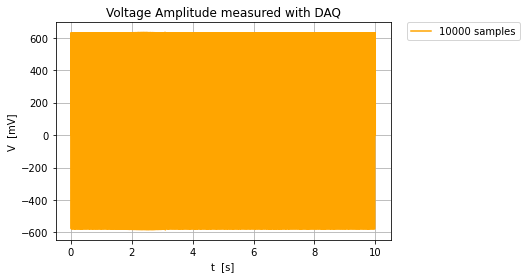

In [8]:
fig,ax= plt.subplots()

ax.grid(True)
#plt.plot(tom,data_off,label= 'AWG off')
plt.plot(tom,data_on*1000,label= '{b} samples'.format(b=n),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title('Voltage Amplitude measured with DAQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [ ]:
task = nidaqmx.Task()

task.ai_channels.add_ai_voltage_chan("DAQBNC1/ai0",min_val=-4,max_val=4)

task.start()

N = 100


data_on = np.array(task.read(N))



task.stop()
task.close

In [28]:
Initialization(M8190A,AWG_Settings4)

Instruments Sampling Frecuency set to 5.00000000000000E+08Hz
Instruments DC1 Output route Voltage set to 7.00000000000000E-01deciVolts


# aqui

In [4]:
Sequence_Pulse_List(PList_secondsA,PList_secondsB,10,0,15,7500000,M8190A,AWG_Settings4,1)

Current Segment Catalogue is 1,7500000  [(segment id, Segment size)]
Current Segment Catalogue is 1,7500000,2,7500000  [(segment id, Segment size)]
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"


(0,
                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.714286            1              1
 2        0.714286            1              1
 3        0.714286            1              1
 4        0.714286            1              1
 ...           ...          ...            ...
 7499995  0.000000            1              1
 7499996  0.000000            1              1
 7499997  0.000000            1              1
 7499998  0.000000            1              1
 7499999  0.000000            1              1
 
 [7500000 rows x 3 columns],
                Y1  SyncMarker1  SampleMarker1
 0        0.000000            0              0
 1        0.714286            0              0
 2        0.714286            0              0
 3        0.714286            0              0
 4        0.714286            0              0
 ...           ...          ...            ...
 7499995  0.000000            0              0
 7499996  0.000000       

In [5]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [6]:
M8190A.write('SEQ:ADV 0, COND')

16

In [8]:
M8190A.query('SEQ:ADV? 0')

'COND'

In [7]:
M8190A.write(':INIT:GATE1 0')
M8190A.write(':INIT:CONT1 0')
M8190A.write(':ARM:TRIG:IMP HIGH')
M8190A.write('ARM:TRIG:LEV 1')

15

In [10]:
M8190A.write('INIT:IMM')

9

In [11]:
Trigger_Pulse('DAQBNC1','ao1',1.5,3)

In [12]:
M8190A.write('ABOR')

5

In [8]:
M8190A.write('TRIG:BEG')

9

In [32]:
125000000*15

1875000000

In [33]:
1875000000/480

3906250.0

In [44]:
M8190A.query('ARM:TRIG:LEV?')

'5.00000000000000E-01'

In [47]:
DataFramesPSscheme['SegmentA_7500000_1']

,Y1,SyncMarker1,SampleMarker1
0,0.000000,1,1
1,0.571429,1,1
2,0.571429,1,1
3,0.571429,1,1
4,0.571429,1,1
...,...,...,...
7499995,0.000000,1,1
7499996,0.000000,1,1
7499997,0.000000,1,1
7499998,0.000000,1,1


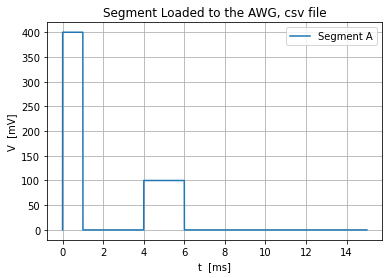

In [51]:
fig,ax= plt.subplots()

ax.grid(True)

plt.plot(timeinterval,DataFramesPSscheme['SegmentA_7500000_1']['Y1']*AWG_Settings2['Voltage Amplitude'],label= 'Segment A')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Segment Loaded to the AWG, csv file')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [13]:
#Dummy version below!


tic = time.time()

DataFramesPSscheme, DataFramesPSschemes2 , timeinterval = Sequence_Loader_List(PScheme,PScheme2,5,15,7500000,0,5,M8190A,AWG_Settings2,1,10)

toc = time.time()

dur = toc -tic

KeyboardInterrupt: 

# Dummy function

In [5]:
#dummy function

tic = time.time()

DataFramesPSscheme, DataFramesPSschemes2 , timeinterval = Sequence_Loader_List_D(PScheme,PScheme2,5,15,7500000,3,5,M8190A,AWG_Settings2,1,10)

toc = time.time()

dur = toc -tic

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Dummy Segment loading ended
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"


In [8]:
dur

120.69200253486633

In [11]:
DataFramesPSscheme

{'SegmentA_7500000_3':                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.666667            1              1
 2        0.666667            1              1
 3        0.666667            1              1
 4        0.666667            1              1
 ...           ...          ...            ...
 7499995  0.000000            1              1
 7499996  0.000000            1              1
 7499997  0.000000            1              1
 7499998  0.000000            1              1
 7499999  0.000000            1              1
 
 [7500000 rows x 3 columns],
 'SegmentA_7500000_4':                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.666667            1              1
 2        0.666667            1              1
 3        0.666667            1              1
 4        0.666667            1              1
 ...           ...          ...            ...
 7499995  0.000000            1 

In [7]:
M8190A.query('SYST:ERR?')

'-300,"Device-specific error;CH1: Waveform file ""SegmentA_7500000_3.csv"" not found."'

In [2]:
AWG_Settings2

{'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
 'Voltage Amplitude': 300,
 'Clock Sample Frecuency': 500000000,
 'Output_Channel': 1,
 'Mode': 'STS',
 'Output_rout': 'DC',
 'Data Directory': 'D:\\Alejandro\\Pulses\\Dict\\S2'}

In [9]:
AWG_Settings2['Data Directory']

'D:\\Alejandro\\Pulses\\Dict\\S2'

In [5]:
type(_)

str

In [ ]:
Sequence_File(instrument,r'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_{a}_{b}.csv'.format(a =N,b=start),r'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentB_{a}_{b}.csv'.format(a = N,b= start),1)

In [12]:
strnga=r'{directory}\SegmentA_{a}_{b}.csv'.format(directory = AWG_Settings2['Data Directory'], a=5, b= 0)

In [13]:
strnga

'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_5_0.csv'

In [14]:
'{aber}'.format(aber = strnga)

'D:\\Alejandro\\Pulses\\Dict\\S2\\SegmentA_5_0.csv'

In [31]:
trigger_task = nidaqmx.Task()

trigger_task.ao_channels.add_ao_voltage_chan('DAQBNC1/ao1','triggering',0,4)
trigger_task.start()

val = 0

trigger_task.write(val)

trigger_task.stop()
trigger_task.close()